<a href="https://colab.research.google.com/github/porselvi15/Abinaya/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('cleaned_rta_dataset.csv')
df.head()
print(df.columns.tolist())


Saving cleaned_rta_dataset.csv to cleaned_rta_dataset (1).csv
['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_conditions', 'type_of_collision', 'number_of_vehicles_involved', 'number_of_casualties', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement', 'cause_of_accident', 'accident_severity', 'weather_conditions_Fog or mist', 'weather_conditions_Normal', 'weather_conditions_Other', 'weather_conditions_Raining', 'weather_conditions_Raining and Windy', 'weather_conditions_Snow', 'weather_conditions_Unknown', 'weather_conditions_Windy', 'road_surface_type_Asphalt roads with some distress', 'road_surface_type

Saving cleaned_rta_dataset.csv to cleaned_rta_dataset (3).csv


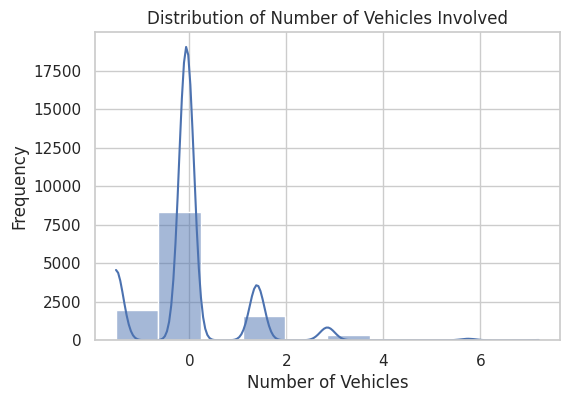

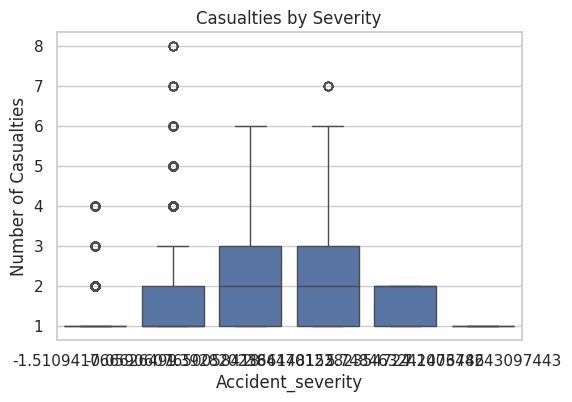

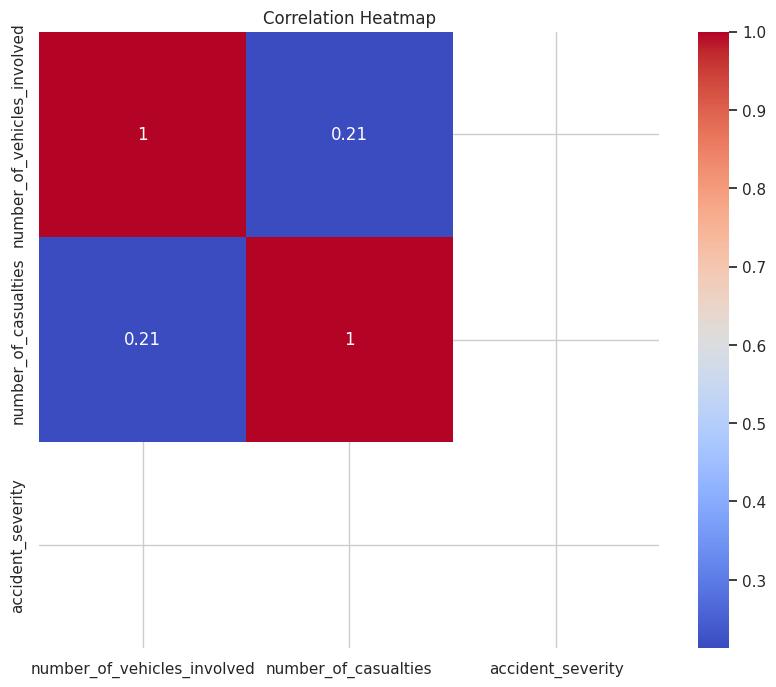

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('cleaned_rta_dataset.csv')
df.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
df = pd.read_csv('cleaned_rta_dataset.csv')

# Set style
sns.set(style="whitegrid")

# Histogram: Number of vehicles involved
plt.figure(figsize=(6, 4))
sns.histplot(df['number_of_vehicles_involved'], bins=10, kde=True)
plt.title('Distribution of Number of Vehicles Involved')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# Boxplot: Number of casualties by accident severity
plt.figure(figsize=(6, 4))
sns.boxplot(x='number_of_vehicles_involved', y='number_of_casualties', data=df)
plt.title('Casualties by Severity')
plt.xlabel('Accident_severity')
plt.ylabel('Number of Casualties')
plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load your cleaned dataset
try:
    df = pd.read_csv('cleaned_rta_dataset.csv')
    print("Dataset loaded successfully!")
    print(df.head())  # Display the first few rows to verify loading
except FileNotFoundError:
    print(f"Error: The file 'cleaned_rta_dataset.csv' was not found. "
          f"Make sure the file is in the same directory as your script or provide the correct path.")
    exit()

# 2. Identify your features (X) and target (y)
# You'll need to replace 'accident' and the feature column names
# with the actual names in your dataset.
# Let's assume 'Accident_Severity' is your target variable
# and you have columns like 'Speeding', 'Alcohol_Impairment', 'Road_Condition' etc.
target_column = 'Accident_Severity'

# Identify potential feature columns. You'll need to adjust this list
# based on the columns in your 'cleaned_rta_dataset.csv' that you want to use
# for prediction. Make sure these are the processed and cleaned features.
feature_columns = [col for col in df.columns if col != target_column]

if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in the dataset.")
    exit()

if not feature_columns:
    print("Error: No feature columns identified. Please check your dataset and column names.")
    exit()

X = df[feature_columns]
y = df[target_column]

# Depending on your 'Accident_Severity' column, you might need to preprocess it
# to be a binary classification (e.g., 'Severe' vs. 'Not Severe').
# For this simple example, we'll assume it's already binary (e.g., 0 and 1).
# If not, you might do something like:
# y = (df['Accident_Severity'] == 'Severe').astype(int)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train a simple Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Dataset loaded successfully!
       time day_of_week age_band_of_driver sex_of_driver   educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  vehicle_driver_relation driving_experience      type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  owner_of_vehicle service_year_of_vehicle  ... weather_conditions_Unknown 

KeyError: 'Accident_Severity'